<a href="https://colab.research.google.com/github/Matsumo-chi/BerryCounting/blob/main/Grapes_BerryCount.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 事前準備
##フレームワークのバージョンを合わせる
GoogleColabに予め用意されているTensorflowとKerasのバージョンが違うので指定

In [ ]:
!pip uninstall keras-nightly
!pip uninstall -y tensorflow
!pip install h5py==2.10.0
!pip install tensorflow==1.15
!pip install tensorflow-gpu==1.15.0
!pip install keras==2.1.6

Found existing installation: tensorflow 2.7.0
Uninstalling tensorflow-2.7.0:
  Successfully uninstalled tensorflow-2.7.0
     |████████████████████████████████| 2.9 MB 5.3 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
     |████████████████████████████████| 412.3 MB 19 kB/s 
     |████████████████████████████████| 503 kB 30.1 MB/s 
     |████████████████████████████████| 50 kB 6.2 MB/s 
     |████████████████████████████████| 3.8 MB 31.2 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=6d5de6009de5b3e3ea06120807d2cb1ae2a397536204d9a28ff20ba7795d79cf
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uni

# **ランタイムを再起動する**
出てくる警告に従ってランタイムを再起動し，次のセルから実行

# Google Driveにzipファイルをアップロードしておく
```
画像.zip
|- "train "ディレクトリ
  |- トレーニングデータのjpg画像ファイル
  |- "via_region_data.json" トレーニングデータのアノテーションファイル
|- "val "ディレクトリ
  |- 検証データのイメージファイル（jpg
  |- "via_region_data.json "検証データのアノテーションファイル
```


In [ ]:
#gitからMask RCNNレポジトリをクローン
%cd
!git clone --quiet https://github.com/matterport/Mask_RCNN.git

/root


In [ ]:
#gitからMask RCNNをインストール
%cd ~/Mask_RCNN

!pip install -q PyDrive
!pip install -r requirements.txt
!python setup.py install

/root/Mask_RCNN
     |████████████████████████████████| 154 kB 5.3 MB/s 
     |████████████████████████████████| 397 kB 37.7 MB/s 
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_lin

# データセットのダウンロードと抽出
image.zipデータセットのGoogle Drive IDでfileId変数を確認して貼り付けておく

ドライブからデータセットをもってくるために認証もやっておく



In [ ]:
%cd ~/Mask_RCNN


fileId = '11c_g8DaxF99_qJAr3j0cA4G9VuZ5u1la'

import os
from zipfile import ZipFile
from shutil import copy
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

os.makedirs('dataset')
os.chdir('dataset')

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

fileName = fileId + '.zip'
downloaded = drive.CreateFile({'id': fileId})
downloaded.GetContentFile(fileName)
ds = ZipFile(fileName)
ds.extractall()
os.remove(fileName)
print('Extracted zip file ' + fileName)

/root/Mask_RCNN
Extracted zip file 11c_g8DaxF99_qJAr3j0cA4G9VuZ5u1la.zip


#設定ファイルの編集
* balloon.pyの"balloon "と "Balloon "の出現箇所を検索し、オブジェクトの名前に置き換え
*  **エポック数の設定**

In [ ]:
%cd ~/Mask_RCNN

!cp ~/Mask_RCNN/samples/balloon/balloon.py ./grapes.py

!sed -i -- 's/balloon/grapes/g' grapes.py
!sed -i -- 's/Balloon/Grapes/g' grapes.py

# エポック数の変更 30-5
!sed -i -- 's/epochs=30/epochs=5/g' grapes.py

/root/Mask_RCNN


## モデルの転移学習
前もって訓練されたウェイトのオプションは、以前に訓練されたモデルのまま

https://qiita.com/kuroyagi/items/e66ca85f8d118c07eb95#7-%E8%A8%93%E7%B7%B4%E3%81%97%E3%81%9F%E7%B5%90%E6%9E%9C%E3%82%92%E4%BD%BF%E3%81%A3%E3%81%A6%E8%87%AA%E5%88%86%E3%81%A7%E6%8E%A8%E8%AB%96

https://qiita.com/omuram/items/a3be821734fd81c3ac59

In [ ]:
%cd ~/Mask_RCNN

!python grapes.py train --dataset=dataset/images/ --weights=coco

/root/Mask_RCNN
Using TensorFlow backend.
Weights:  coco
Dataset:  dataset/images/
Logs:  /logs

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcn

#Run inference on test dataset

In [ ]:
import os
import cv2
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import skimage
import glob
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

import grapes

# プロジェクトのルートディレクトリ
ROOT_DIR = os.getcwd()

# インポートMask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library

custom_WEIGHTS_PATH = sorted(glob.glob("/logs/*/mask_rcnn_*.h5"))[-1]

%matplotlib inline 

# ログや学習したモデルを保存するディレクトリ
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

config = grapes.GrapesConfig()
custom_DIR = os.path.join(ROOT_DIR, "dataset/images")

class InferenceConfig(config.__class__):
    # 一度に1枚の画像に対して検出を行う
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()

# ニューラルネットワークをロードするデバイス。
# 同じマシンでモデルをトレーニングする場合に便利。GPUをトレーニング用に残す。
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

# トレーニングモードまたは推論モードでモデルを検査する 値を設定します。推論」または「トレーニング」。
# TODO: 'training' テストモードのコードはまだ準備できていません。
TEST_MODE = "inference"

def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax
  
# 検証用データセットの読み込み
dataset = grapes.GrapesDataset()
dataset.load_grapes(custom_DIR, "val")

# データセットを使用する前に必ず呼び出す
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

# 推論モードでのモデル作成
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

# 最後にトレーニングしたモデルをロードする
# weights_path = model.find_last()[1]

#重みを読み込む
print("Loading weights ", custom_WEIGHTS_PATH)
model.load_weights(custom_WEIGHTS_PATH, by_name=True)

from importlib import reload # was constantly changin the visualization, so I decided to reload it instead of notebook
reload(visualize)


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

Using TensorFlow backend.




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.
Loading weights  /logs/grapes20211115T1427/mask_rcnn_grapes_0005.h5






Re-starting from epoch 5


<module 'mrcnn.visualize' from '/root/Mask_RCNN/mrcnn/visualize.py'>

#テストデータセットでの推論の実行

image ID: grapes.image_005.jpg (0) /root/Mask_RCNN/dataset/images/val/image_005.jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
gt_class_id              shape: (30,)                 min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (30, 4)               min:  123.00000  max:  912.00000  int32
gt_mask                  shape: (1024, 1024, 30)      min:    0.00000  max:    1.00000  bool
image ID: grapes.image_225.jpg (1) /root/Mask_RCNN/dataset/images/val/image_225.jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 1

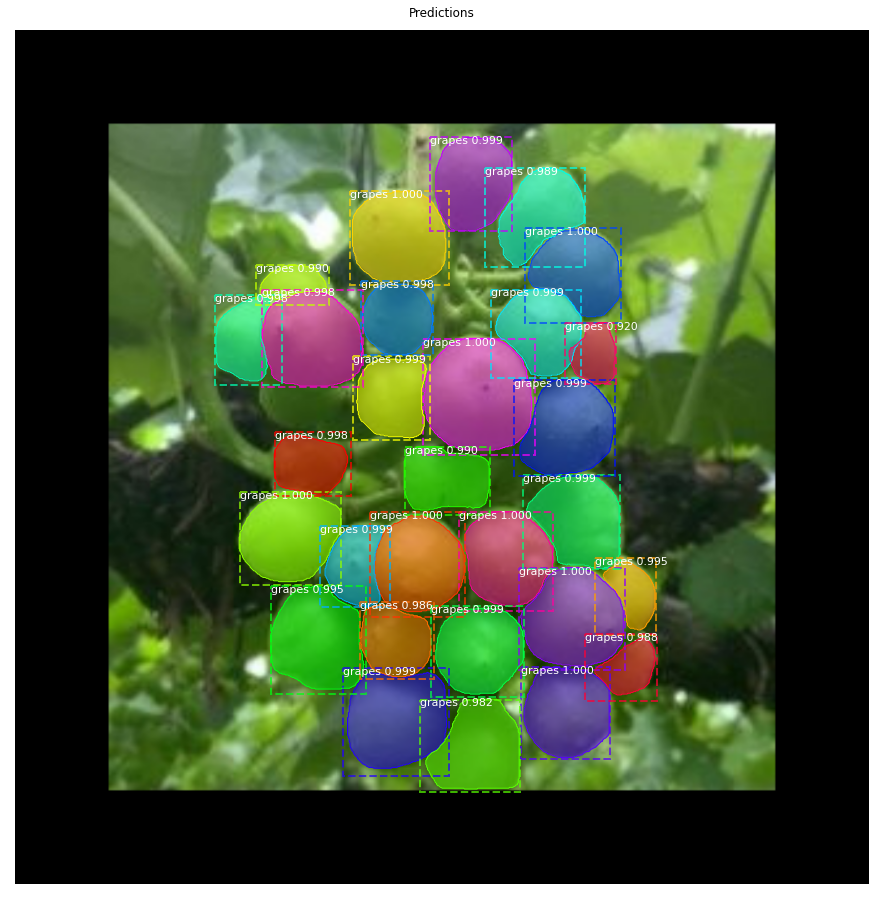

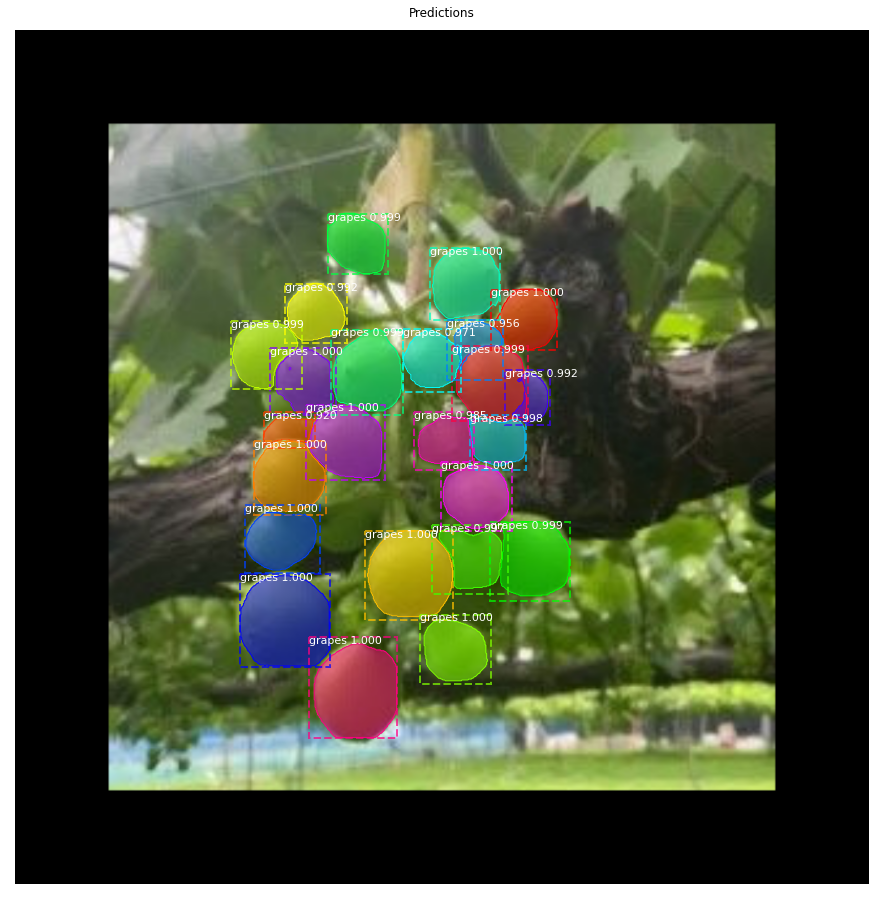

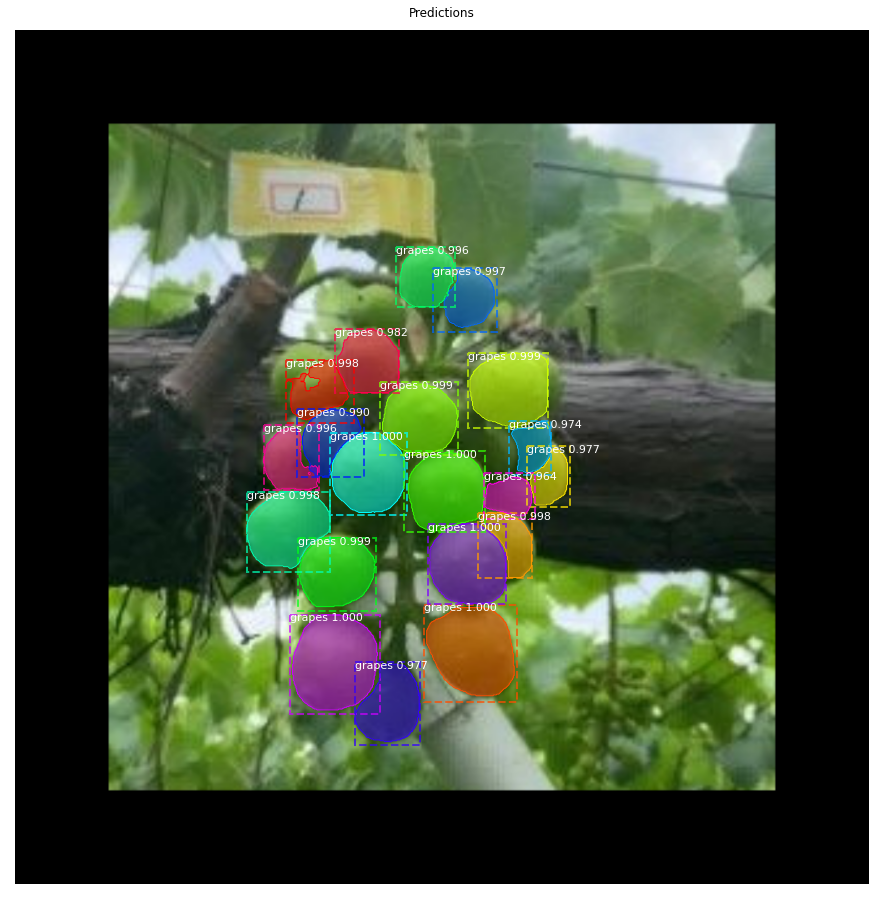

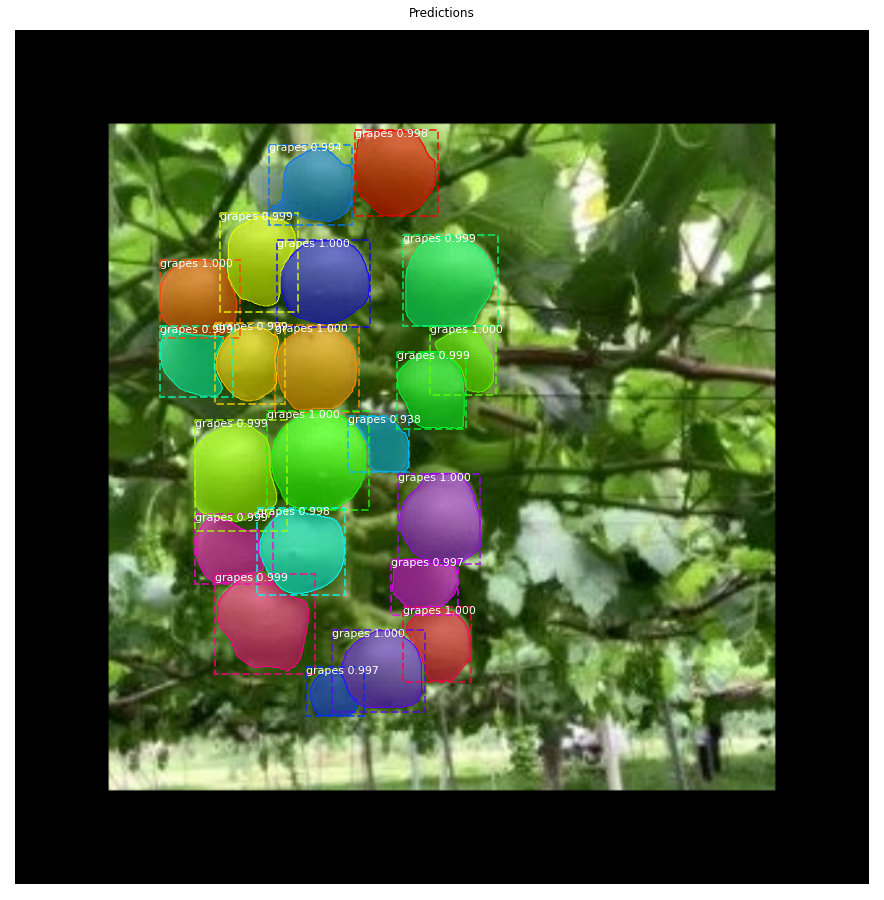

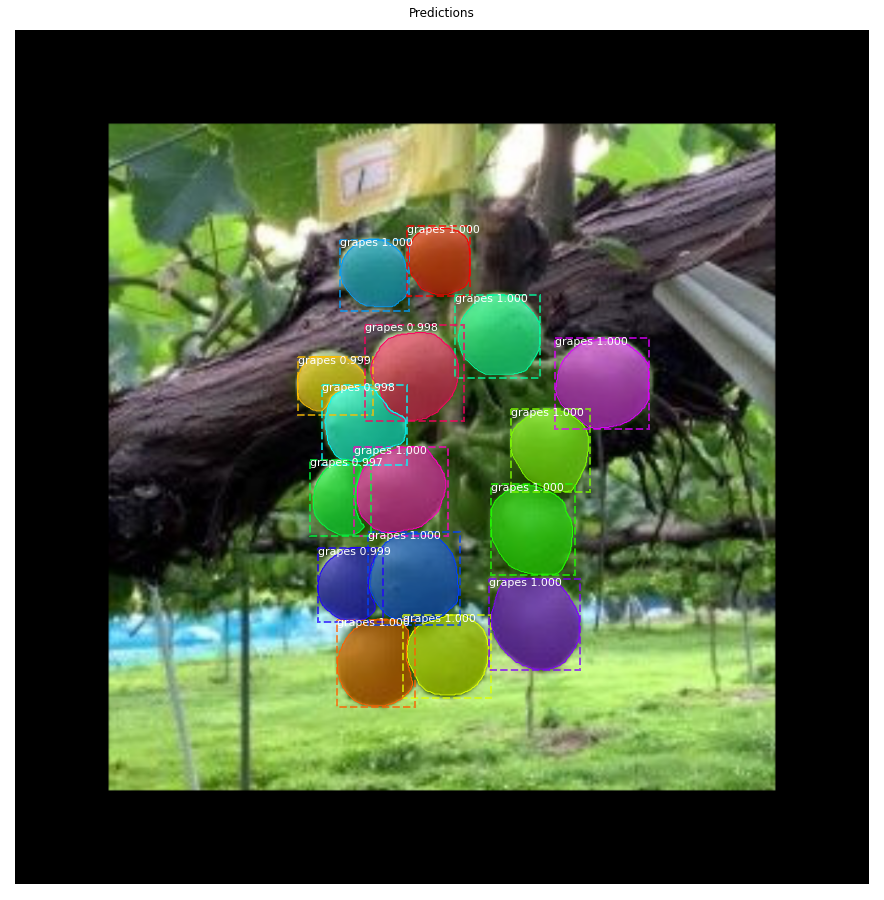

In [ ]:
#image_id = random.choice(dataset.image_ids)
for image_id in dataset.image_ids:
  image, image_meta, gt_class_id, gt_bbox, gt_mask =\
      modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
  info = dataset.image_info[image_id]
  print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                         dataset.image_reference(image_id)))

  # 物体検出の実行
  results = model.detect([image], verbose=1)

  # 表示結果
  ax = get_ax(1)
  r = results[0]
  visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                              dataset.class_names, r['scores'], ax=ax,
                              title="Predictions")
  log("gt_class_id", gt_class_id)
  log("gt_bbox", gt_bbox)
  log("gt_mask", gt_mask)